# Linear regression with Python

Linear regression can be done in many different ways with Python.
We retained 2 methods, statsmodels and scikit-learn. The two libraries each have their qualities and their defects, one is more oriented data science and the other more for economists.

For example, statsmodel will provide you directly with the regression table, for scikit it's less immediate
We start by loading all the packages that will be used in this notebook:

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
from sklearn import linear_model
from sklearn import metrics

We are going to use the famous Iris database which we can be called from the seaborn library.

For each flower, we have information on the length and width of its sepals as well as its petals.

To understand the difference in pictures: [Sepal vs Petal](http://idao.cirad.fr/content/adventoi/defs/235_fr.html).

In [2]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Let’s explore the data a little bit by checking the number of rows and columns in our datasets.

In [3]:
print(iris.shape)

(150, 5)


To see the statistical details of the dataset, we can use describe():

In [4]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


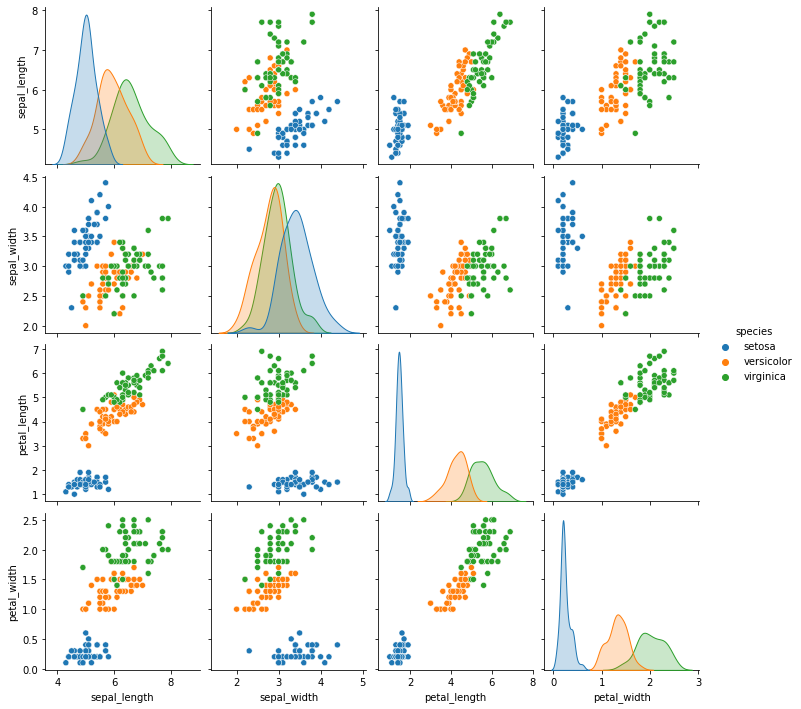

In [5]:
sns.pairplot(iris, hue="species");

Thanks to these graphics, we observe a strong relationship between length and width of the petals.

Let’s plot our data points on a 2-D graph to eyeball our feature and target and see if we can manually find any relationship between the data:

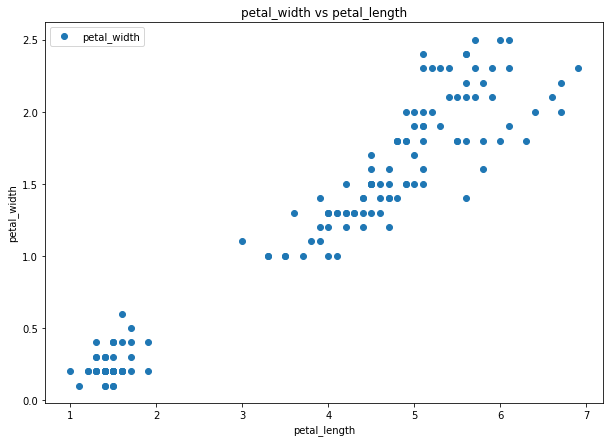

In [6]:
iris.plot(x='petal_length', y='petal_width', style='o', figsize=(10,7))  
plt.title('petal_width vs petal_length')  
plt.xlabel('petal_length')  
plt.ylabel('petal_width')  
plt.show()

Let’s check the distribution of the average petal width

/Users/az01661/Dropbox/Deep Learning ECE/dl-venv/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='petal_width', ylabel='Density'>

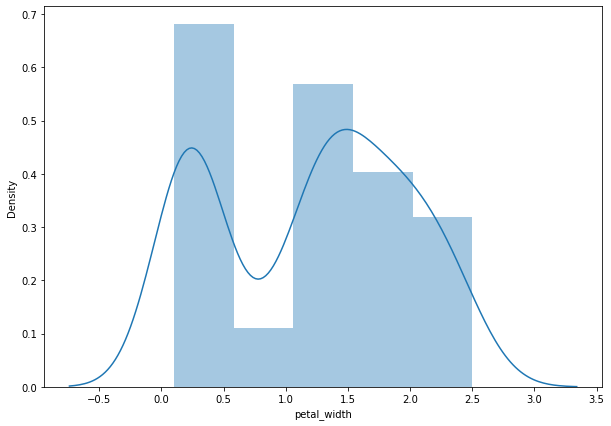

In [7]:
plt.figure(figsize=(10,7))
plt.tight_layout()
sns.distplot(iris['petal_width'])

## 1. Univariate regression with seaborn

We perform a one-variable regression between length and width using seaborn.

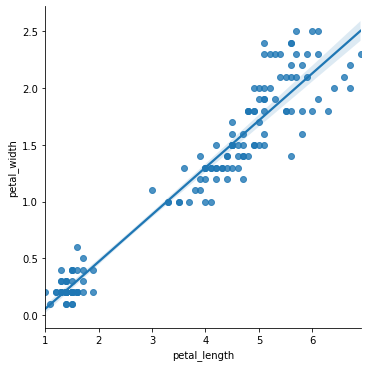

In [8]:
sns.lmplot(x="petal_length", y="petal_width", data=iris);

If we observe that a relationship exists, we do not know much else.

## 2. Regression using scikit-learn

The next step is to create the regression model as an instance of LinearRegression and fit it with .fit():

In [9]:
model = linear_model.LinearRegression()

This statement creates the variable model as the instance of LinearRegression. You can provide several optional parameters to LinearRegression:

* **fit_intercept** is a Boolean (True by default) that decides whether to calculate the intercept $\theta_0$ (True) or consider it equal to zero (False).
* **normalize** is a Boolean (False by default) that decides whether to normalize the input variables (True) or not (False).
* **copy_X** is a Boolean (True by default) that decides whether to copy (True) or overwrite the input variables (False).
* **n_jobs** is an integer or None (default) and represents the number of jobs used in parallel computation. None usually means one job and -1 to use all processors.

This example uses the default values of all parameters.

In [10]:
X = iris[["petal_length"]]
y = iris["petal_width"]
results = model.fit(X, y)

But in terms of presentation of results, it's a bit limited ... No standard errors, no performance measurements, etc (at least not automatically).

Once you have your model fitted, you can get the results to check whether the model works satisfactorily and interpret it.

You can obtain the coefficient of determination $R^2$ (we'll see in the next chapter) with .score() called on model:

In [11]:
r_sq = results.score(X, y)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.9271098389904927


When you’re applying .score(), the arguments are also the predictor X and target y, and the return value is 𝑅².

The attributes of model are .intercept_, which represents the coefficient, $\theta_0$ and .coef_, which represents $\theta_1$:

In [12]:
print('intercept:', results.intercept_)
print('slope:', results.coef_)

intercept: -0.3630755213190291
slope: [0.41575542]


The best linear approximation is therefore y = $\theta_0 + \theta_1 x$ with
- $\theta_0 = −0.363075521319$
- $\theta_1 = 0.41575542$

The code above illustrates how to get $\theta_0$ and $\theta_1$. You can notice that .intercept_ is a scalar, while .coef_ is an array.

The value $\theta_0 = −0.36$ (approximately) illustrates that your model predicts the response −0.36 when 𝑥 is zero. The value $\theta_1 = 0.42$ means that the predicted response rises by 0.42 when 𝑥 is increased by one.

Once there is a satisfactory model, you can use it for predictions with either existing or new data.

To obtain the predicted response, use .predict():

In [13]:
y_pred = results.predict(X)
print('predicted response:', y_pred[:10], sep='\n')

predicted response:
[0.21898206 0.21898206 0.17740652 0.2605576  0.21898206 0.34370869
 0.21898206 0.2605576  0.21898206 0.2605576 ]


When applying .predict(), you pass the regressor as the argument and get the corresponding predicted response.

This is a nearly identical way to predict the response:

In [14]:
y_pred_2 = results.intercept_ + results.coef_ * X
print('predicted response:', y_pred_2[:10], sep='\n')

predicted response:
   petal_length
0      0.218982
1      0.218982
2      0.177407
3      0.260558
4      0.218982
5      0.343709
6      0.218982
7      0.260558
8      0.218982
9      0.260558


We can also visualize comparison result as a bar graph using the below script :

Note: As the number of records is huge, for representation purpose we'll take just 25 records.

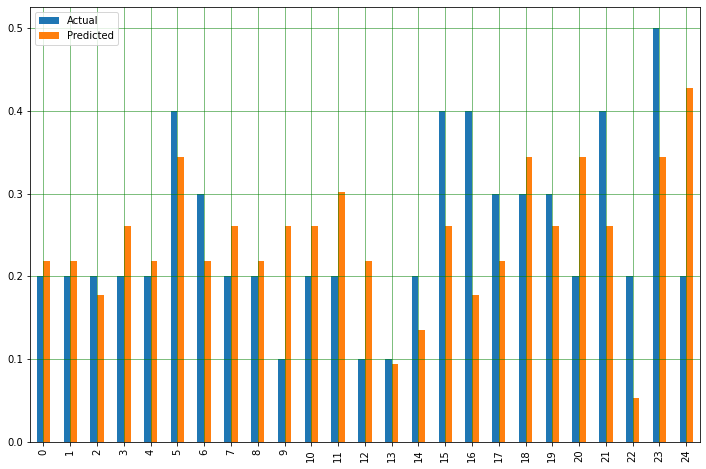

In [15]:
df = pd.DataFrame({'Actual': y, 'Predicted': y_pred})
df1 = df.head(25)
df1.plot(kind='bar',figsize=(12,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

Let's evaluate the performance of the algorithm using an objective metric. This step is particularly important to compare how well different algorithms perform on a particular dataset. 

Let's use the MSE as our objective metric. The MSE is equivelent to the cost function that we saw earlier:

\begin{equation}
MSE = \dfrac {1}{m} \displaystyle \sum _{i=1}^m \left ( \hat{y}_{i}- y_{i} \right)^2 
\end{equation}

In [16]:
print('Mean Absolute Error:', metrics.mean_squared_error(y, y_pred))  

Mean Absolute Error: 0.04206730919499318


In practice, regression models are often applied for forecasts. This means that you can use fitted models to calculate the outputs based on some other, new inputs:

In [17]:
X_new = np.arange(7).reshape((-1, 1))
print(X_new)

[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]]


In [18]:
y_new = model.predict(X_new)
print(y_new)

[-0.36307552  0.0526799   0.46843531  0.88419073  1.29994614  1.71570156
  2.13145698]


Here .predict() is applied to the new regressor x_new and yields the response y_new. This example conveniently uses arange() from numpy to generate an array with the elements from 0 (inclusive) to 7 (exclusive).

## 3. Regression using statsmodels

Note: we invoke X and y in the model specification for this library.

In [19]:
model = sm.OLS(y, X)
results = model.fit()
# Avec  statsmodel, on a une sortie qui ressemble beaucoup à celle de R
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:            petal_width   R-squared (uncentered):                   0.967
Model:                            OLS   Adj. R-squared (uncentered):              0.967
Method:                 Least Squares   F-statistic:                              4417.
Date:                Wed, 07 Oct 2020   Prob (F-statistic):                   1.22e-112
Time:                        12:27:57   Log-Likelihood:                         -8.7179
No. Observations:                 150   AIC:                                      19.44
Df Residuals:                     149   BIC:                                      22.45
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

The variable results refers to the object that contains detailed information about the results of linear regression. 

This table is very comprehensive. You can find many statistical values associated with linear regression including $R^2$, $\theta_0$ and $\theta_1$.

In this particular case, you might obtain the warning. This is due to the small number of observations provided.

If you take a closer look, you will see that the coefficients of the two regressions are close but not equal. Precision problem? No...

You have to be careful with statsmodels, it does not itself include an intercept ($ \theta_0 $) while scikit learn does.

In [20]:
X = iris["petal_length"]
X = sm.add_constant(X)
y = iris["petal_width"]
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            petal_width   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     1882.
Date:                Wed, 07 Oct 2020   Prob (F-statistic):           4.68e-86
Time:                        12:27:57   Log-Likelihood:                 24.796
No. Observations:                 150   AIC:                            -45.59
Df Residuals:                     148   BIC:                            -39.57
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.3631      0.040     -9.131   

That's it, the coefficients of scikit-learn and statsmodels are almost identical (in reality if you look after the 10th decimal, they are slightly different ...)

If we look at the $ R ^ 2 $ (performance measure that we will see later!), We say that we are pretty good for this regression (at the same time, say that for an iris, the length and the width of the petal are correlated, it's a bit normal ...)

You can extract any of the values from the table above. Here’s an example:

In [21]:
print('coefficient of determination:', results.rsquared)
print('adjusted coefficient of determination:', results.rsquared_adj)
print('regression coefficients:', results.params)

coefficient of determination: 0.9271098389904927
adjusted coefficient of determination: 0.9266173379025906
regression coefficients: const          -0.363076
petal_length    0.415755
dtype: float64


You can also notice that these results are identical to those obtained with scikit-learn for the same problem.

You can obtain the predicted response on the input values used for creating the model using .fittedvalues or .predict() with the input array as the argument:

In [22]:
print('predicted response:', results.fittedvalues[:10], sep='\n')

predicted response:
0    0.218982
1    0.218982
2    0.177407
3    0.260558
4    0.218982
5    0.343709
6    0.218982
7    0.260558
8    0.218982
9    0.260558
dtype: float64


In [23]:
print('predicted response:', results.predict(X[:10]), sep='\n')

predicted response:
0    0.218982
1    0.218982
2    0.177407
3    0.260558
4    0.218982
5    0.343709
6    0.218982
7    0.260558
8    0.218982
9    0.260558
dtype: float64


This is the predicted response for known inputs. If you want predictions with new regressors, you can also apply .predict() with new data as the argument:

In [24]:
X_new = sm.add_constant(np.arange(7))
print(X_new)

[[1. 0.]
 [1. 1.]
 [1. 2.]
 [1. 3.]
 [1. 4.]
 [1. 5.]
 [1. 6.]]


In [25]:
y_new = results.predict(X_new)
print(y_new)

[-0.36307552  0.0526799   0.46843531  0.88419073  1.29994614  1.71570156
  2.13145698]


## 4. Conclusion

You now know what linear regression is and how you can implement it with Python and three open-source packages: scikit-learn, and statsmodels.

Linear regression is implemented with the following:

* scikit-learn if you don’t need detailed results and want to use the approach consistent with other regression techniques
* statsmodels if you need the advanced statistical parameters of a model

Both approaches are worth learning how to use and exploring further.

###  Beyond Linear Regression

Linear regression is sometimes not appropriate, especially for non-linear models of high complexity.

Fortunately, there are other regression techniques suitable for the cases where linear regression doesn’t work well. Some of them are support vector machines, decision trees, random forest, and neural networks.

There are numerous Python libraries for regression using these techniques. Most of them are free and open-source. That’s one of the reasons why Python is among the main programming languages for machine learning.

The package scikit-learn provides the means for using other regression techniques in a very similar way to what you’ve seen. It contains the classes for support vector machines, decision trees, random forest, and more, with the methods .fit(), .predict(), .score() and so on.